**Question 3: Is there a correlation between cumulative cases and cumulative deaths across countries?**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
cases_df = pd.read_csv('../../dataset/WHO-COVID-19-global-table-data.csv',index_col=False)

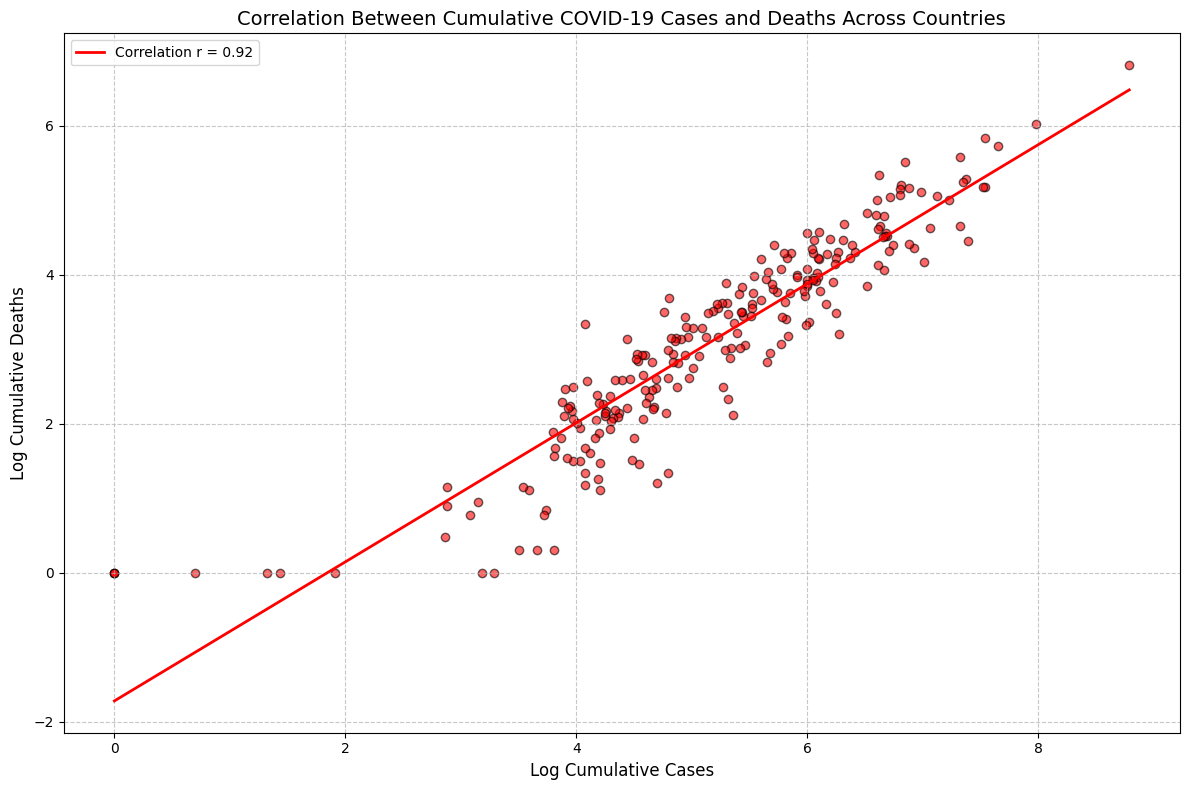

In [4]:
# Removing the rows with missing cumulative cases or deaths to make sure we can plot
cases_df = cases_df.dropna(subset=['Cases - cumulative total', 'Deaths - cumulative total'])
# Transform the data by using logarithm for better visualization and to handle large ranges
x = np.log10(cases_df['Cases - cumulative total'] + 1)
y = np.log10(cases_df['Deaths - cumulative total'] + 1)

# Perform linear regression to quantify correlation between log cases and log deaths
slope, intercept, r, p, std = linregress(x, y)
# Initialize the figure with specified size
plt.figure(figsize=(12, 8))
# Scatter plot of log-transformed cumulative cases vs deaths
plt.scatter(x, y, color='red', alpha=0.6, edgecolor='black')
plt.plot(x, slope * x + intercept, color='red', linewidth=2, label=f'Correlation r = {r:.2f}')
# Label the axes
plt.xlabel('Log Cumulative Cases', fontsize=12)
plt.ylabel('Log Cumulative Deaths', fontsize=12)
# Add a title to the chart
plt.title('Correlation Between Cumulative COVID-19 Cases and Deaths Across Countries', fontsize=14)

# Display the plot
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Correlation Between Cumulative COVID-19 Cases and Deaths Across Countries.png')
plt.show()
plt.close()


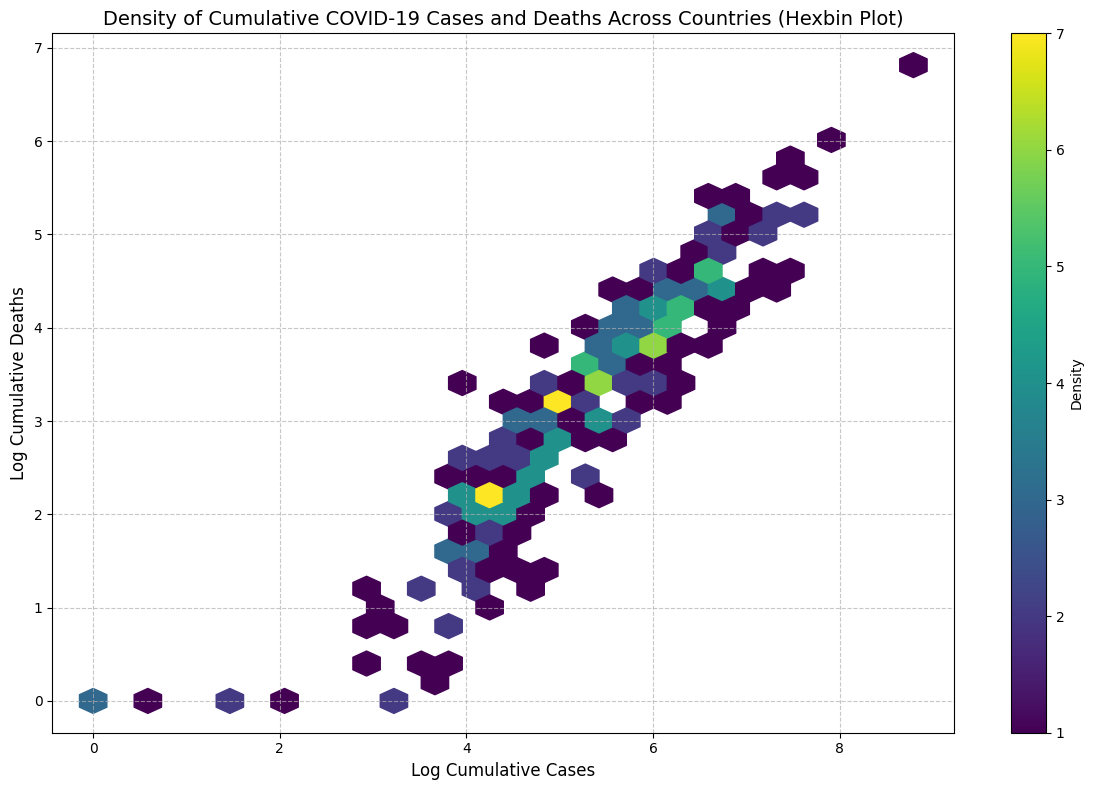

In [5]:
cases_df = cases_df.dropna(subset=['Cases - cumulative total', 'Deaths - cumulative total'])
x = np.log10(cases_df['Cases - cumulative total'] + 1)
y = np.log10(cases_df['Deaths - cumulative total'] + 1)

plt.figure(figsize=(12, 8))
plt.hexbin(x, y, gridsize=30, cmap='viridis', mincnt=1)
plt.colorbar(label='Density')
plt.xlabel('Log Cumulative Cases', fontsize=12)
plt.ylabel('Log Cumulative Deaths', fontsize=12)
plt.title('Density of Cumulative COVID-19 Cases and Deaths Across Countries (Hexbin Plot)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('alt_plot3.png')
plt.show()
plt.close()